In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib import cm
import re
from math import sinh

In [3]:
EEs = []
for m in range(1, 9):
    dir = './results/n_20_m_{}_loss_0.5_chi_{}_r_1.45_PS_{}/'.format(m, 8*2**m, m)
    files = os.listdir(dir)
    files = [file for file in files if file[:2] == 'EE']
    print('{} files for m = {}'.format(len(files), m))
    tot_ee = 0
    for file in files:
        ee = np.load(dir + file)
        # print('ee:', ee)
        ee = np.max(ee)
        # print('ee:', ee)
        tot_ee += ee
    ave_ee = tot_ee/len(files)
    EEs.append(ave_ee)

plt.plot(range(1, 9), EEs, 'o')
plt.xlabel('m')
plt.ylabel('EE')

FileNotFoundError: [Errno 2] No such file or directory: './results/n_20_m_1_loss_0.5_chi_16_r_1.45_PS_1/'

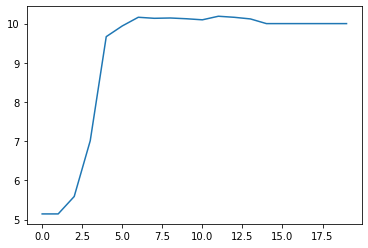

In [36]:
ee = np.load(dir + file)
plt.plot(np.max(ee, axis=0))

In [37]:
np.set_printoptions(3)
ee.T

array([[ 2.612,  3.765,  4.414,  4.795,  5.019,  5.144,  2.953,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ],
       [ 2.787,  3.765,  4.414,  4.795,  5.019,  5.144,  2.953,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ],
       [ 3.05 ,  5.007,  5.589,  4.795,  5.019,  5.144,  2.953,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ],
       [ 2.843,  5.386,  6.585,  7.01 ,  6.206,  5.144,  2.953,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ],
       [ 3.765,  7.037,  9.307,  9.666,  8.715,  6.796,  3.8  ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ],
       [ 3.467,  6.589,  8.928,  9.94 ,  9.802,  8.425,  6.333,  3.11 ,
         0.   ,  0.   ,  0.   ,  0.   ,  0.

32 files for m = 1
32 files for m = 2
32 files for m = 3
32 files for m = 4
31 files for m = 5
32 files for m = 6
32 files for m = 7
32 files for m = 8


Text(0, 0.5, 'Layer')

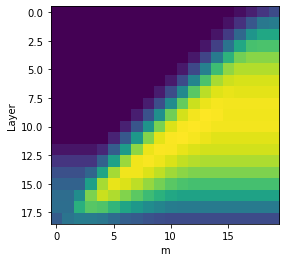

In [44]:
EEs = np.zeros([19, 20])
for m in range(1, 9):
    dir = './results/n_20_m_{}_loss_0.5_chi_{}_r_1.45_PS_{}/'.format(m, 8*2**m, m)
    files = os.listdir(dir)
    files = [file for file in files if file[:2] == 'EE']
    print('{} files for m = {}'.format(len(files), m))
    tot_ee = 0
    for file in files:
        ee = np.load(dir + file)
        EEs += ee

plt.imshow(np.flip(EEs, axis=0))
plt.xlabel('m')
plt.ylabel('Layer')

In [3]:
import numpy as np
import os
import re
import matplotlib.pyplot as plt

./results/n_20_m_4_loss_0.5_r_1.15/chi_10_PS_0
./results/n_20_m_4_loss_0.5_r_1.15/chi_16_PS_1
./results/n_20_m_4_loss_0.5_r_1.15/chi_35_PS_2
./results/n_20_m_4_loss_0.5_r_1.15/chi_60_PS_3
./results/n_20_m_4_loss_0.5_r_1.15/chi_103_PS_4
./results/n_20_m_4_loss_0.5_r_1.15/chi_167_PS_5
./results/n_20_m_4_loss_0.5_r_1.15/chi_267_PS_6
./results/n_20_m_4_loss_0.5_r_1.15/chi_418_PS_7
./results/n_20_m_4_loss_0.5_r_1.15/chi_646_PS_8
./results/n_20_m_4_loss_0.5_r_1.15/chi_987_PS_9
./results/n_20_m_4_loss_0.5_r_1.15/chi_1495_PS_10
./results/n_20_m_4_loss_0.5_r_1.15/chi_2246_PS_11
./results/n_20_m_4_loss_0.5_r_1.15/chi_3355_PS_12
./results/n_20_m_4_loss_0.5_r_1.15/chi_4983_PS_13
./results/n_20_m_6_loss_0.5_r_1.15/chi_4_PS_0
./results/n_20_m_6_loss_0.5_r_1.15/chi_9_PS_1
./results/n_20_m_6_loss_0.5_r_1.15/chi_25_PS_2
./results/n_20_m_6_loss_0.5_r_1.15/chi_52_PS_3
./results/n_20_m_6_loss_0.5_r_1.15/chi_103_PS_4
./results/n_20_m_6_loss_0.5_r_1.15/chi_191_PS_5
./results/n_20_m_6_loss_0.5_r_1.15/chi_342

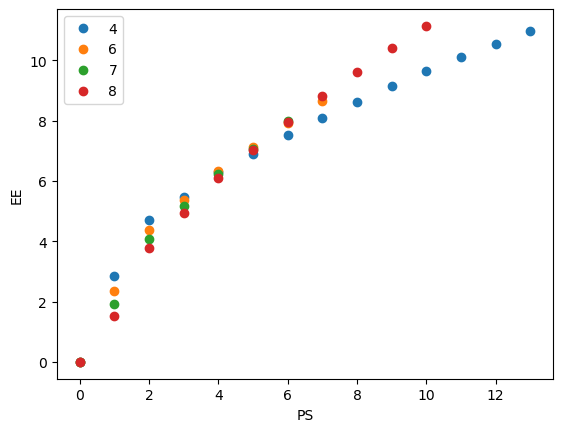

In [36]:
for m in [4,6,7,8]:
    EEs = []
    parent_dir = './results/n_20_m_{}_loss_0.5_r_1.15/'.format(m)
    dirs = os.listdir(parent_dir)
    tot_ps = len(dirs) - 1
    for PS in range(0, tot_ps):
        pattern = re.compile('chi_\d*_PS_{}$'.format(PS))
        for dir in dirs:
            match = pattern.findall(dir)
            if len(match) != 0:
                ps_dir = parent_dir + match[0]
        print(ps_dir)
        files = os.listdir(ps_dir)
        files = [file for file in files if file[:2] == 'EE']
        tot_ee = 0
        for file in files:
            ee = np.load(ps_dir + '/' + file)
            # print('ee:', ee)
            ee = np.max(ee)
            # print('ee:', ee)
            tot_ee += ee
        if len(files) != 0:
            ave_ee = tot_ee/len(files)
        else:
            ave_ee = None
        EEs.append(ave_ee)

    plt.plot(range(0, tot_ps), EEs, 'o', label='{}'.format(m))
    plt.xlabel('PS')
    plt.ylabel('EE')
plt.legend()

In [27]:
import numpy as np
import os
import re
import matplotlib.pyplot as plt
from math import sinh, sqrt

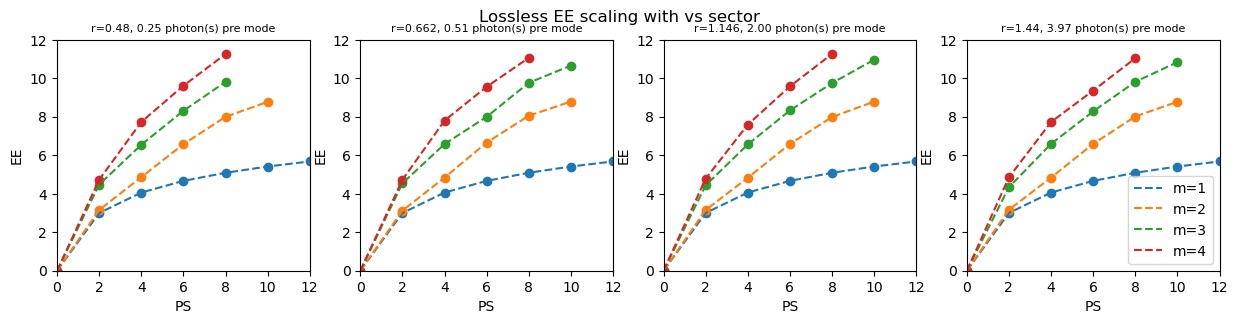

In [7]:
f = plt.figure(figsize=(15,3))
for i, r in enumerate([0.48, 0.662, 1.146, 1.44]):
    ax = f.add_subplot(1,4,i+1)
    for m in range(1,5):
        EEs = []
        parent_dir = './Lossless EE scaling with vs sector/n_20_m_{}_loss_0.0_r_{}/'.format(m, r)
        dirs = os.listdir(parent_dir)
        tot_ps = len(dirs)
        for PS in range(tot_ps+1):
            PS = PS * 2
            if PS == 0:
                ave_ee = 0
            else:
                pattern = re.compile('chi_\d*_PS_{}$'.format(PS))
                for dir in dirs:
                    match = pattern.findall(dir)
                    if len(match) != 0:
                        ps_dir = parent_dir + match[0]
                # print(PS, ps_dir)
                files = os.listdir(ps_dir)
                files = [file for file in files if file[:2] == 'EE']
                tot_ee = 0
                for file in files:
                    ee = np.load(ps_dir + '/' + file)
                    # print('ee:', ee)
                    ee = np.max(ee)
                    # print('ee:', ee)
                    tot_ee += ee
                if len(files) != 0:
                    ave_ee = tot_ee/len(files)
                else:
                    ave_ee = None
            EEs.append(ave_ee)

        ax.plot(np.array([ps for ps in range(tot_ps+1)])*2, EEs, '--', label='m={}'.format(m))
        ax.scatter(np.array([ps for ps in range(tot_ps+1)])*2, EEs)
        ax.set_ylim(0,12)
        ax.set_xlim(0,12)
        ax.set_xticks([0,2,4,6,8,10,12])
        ax.set_xlabel('PS')
        ax.set_ylabel('EE')
        ax.set_title('r={}, {:.2f} photon(s) pre mode'.format(r, sinh(r)**2), fontsize=8)
        if i == 3:
            ax.legend()
f.suptitle('Lossless EE scaling with vs sector')
plt.savefig('Lossless EE scaling with vs sector.pdf')

Text(0.5, 0.98, 'Loss=0.5 EE scaling with vs sector')

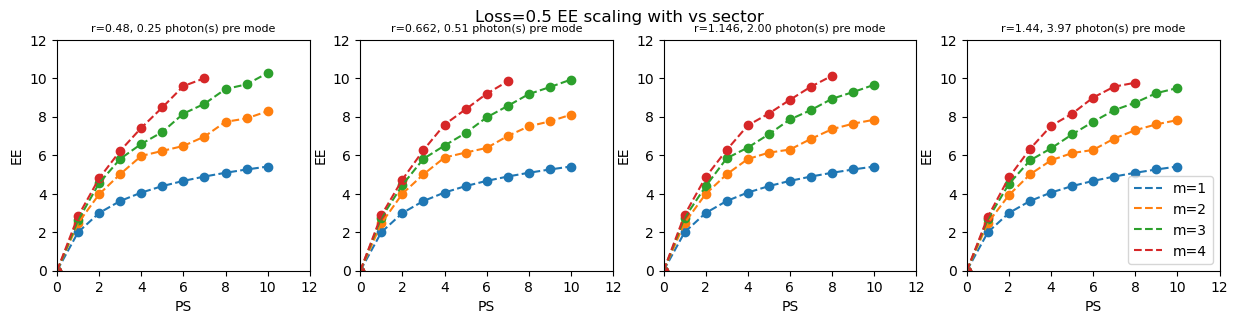

In [48]:
f = plt.figure(figsize=(15,3))
for i, r in enumerate([0.48, 0.662, 1.146, 1.44]):
    ax = f.add_subplot(1,4,i+1)
    for m in range(1,5):
        EEs = []
        parent_dir = './lossy EE vs sector/n_20_m_{}_loss_0.5_r_{}/'.format(m, r)
        dirs = os.listdir(parent_dir)
        tot_ps = len(dirs)
        for PS in range(tot_ps):
            pattern = re.compile('chi_\d*_PS_{}$'.format(PS))
            for dir in dirs:
                match = pattern.findall(dir)
                if len(match) != 0:
                    ps_dir = parent_dir + match[0]
            # print(PS, ps_dir)
            files = os.listdir(ps_dir)
            files = [file for file in files if file[:2] == 'EE']
            tot_ee = 0
            for file in files:
                ee = np.load(ps_dir + '/' + file)
                # print('ee:', ee)
                ee = np.max(ee)
                # print('ee:', ee)
                tot_ee += ee
            if len(files) != 0:
                ave_ee = tot_ee/len(files)
            else:
                ave_ee = None
            EEs.append(ave_ee)

        ax.plot(np.array([ps for ps in range(tot_ps)]), EEs, '--', label='m={}'.format(m))
        ax.scatter(np.array([ps for ps in range(tot_ps)]), EEs)
        ax.set_ylim(0,12)
        ax.set_xlim(0,12)
        ax.set_xticks([0,2,4,6,8,10,12])
        ax.set_xlabel('PS')
        ax.set_ylabel('EE')
        ax.set_title('r={}, {:.2f} photon(s) pre mode'.format(r, sinh(r)**2), fontsize=8)
        if i == 3:
            ax.legend()
f.suptitle('Loss=0.5 EE scaling with vs sector')
# plt.savefig('Loss=0.5 EE scaling with vs sector.pdf')

Text(0.5, 0.98, 'Loss=0.75 EE scaling with vs sector')

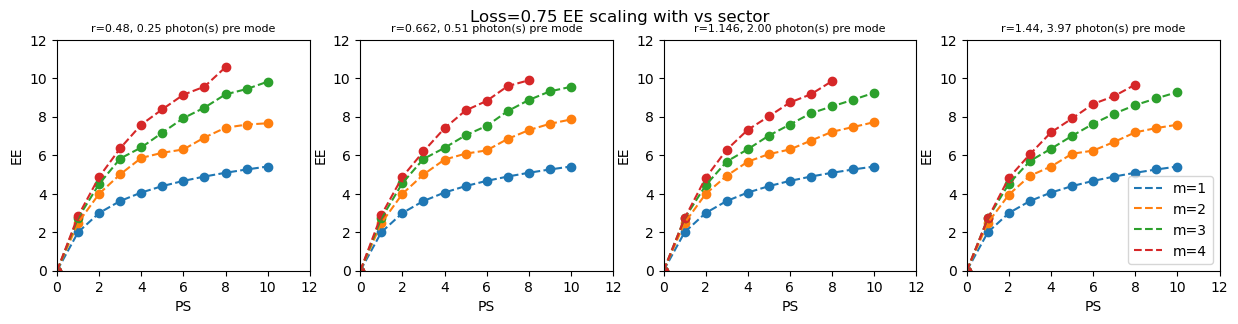

In [49]:
f = plt.figure(figsize=(15,3))
for i, r in enumerate([0.48, 0.662, 1.146, 1.44]):
    ax = f.add_subplot(1,4,i+1)
    for m in range(1,5):
        EEs = []
        parent_dir = './lossy EE vs sector/n_20_m_{}_loss_0.75_r_{}/'.format(m, r)
        dirs = os.listdir(parent_dir)
        tot_ps = len(dirs)
        for PS in range(tot_ps):
            pattern = re.compile('chi_\d*_PS_{}$'.format(PS))
            for dir in dirs:
                match = pattern.findall(dir)
                if len(match) != 0:
                    ps_dir = parent_dir + match[0]
            # print(PS, ps_dir)
            files = os.listdir(ps_dir)
            files = [file for file in files if file[:2] == 'EE']
            tot_ee = 0
            for file in files:
                ee = np.load(ps_dir + '/' + file)
                # print('ee:', ee)
                ee = np.max(ee)
                # print('ee:', ee)
                tot_ee += ee
            if len(files) != 0:
                ave_ee = tot_ee/len(files)
            else:
                ave_ee = None
            EEs.append(ave_ee)

        ax.plot(np.array([ps for ps in range(tot_ps)]), EEs, '--', label='m={}'.format(m))
        ax.scatter(np.array([ps for ps in range(tot_ps)]), EEs)
        ax.set_ylim(0,12)
        ax.set_xlim(0,12)
        ax.set_xticks([0,2,4,6,8,10,12])
        ax.set_xlabel('PS')
        ax.set_ylabel('EE')
        ax.set_title('r={}, {:.2f} photon(s) pre mode'.format(r, sinh(r)**2), fontsize=8)
        if i == 3:
            ax.legend()
f.suptitle('Loss=0.75 EE scaling with vs sector')
# plt.savefig('Loss=0.75 EE scaling with vs sector.pdf')

In [1]:
import numpy as np
import os
import re
import matplotlib.pyplot as plt
from math import sinh, sqrt

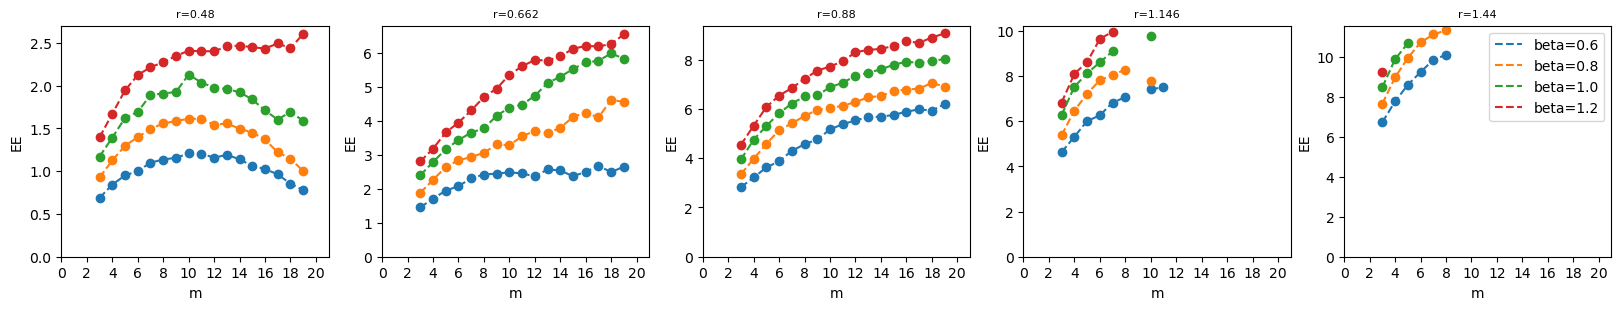

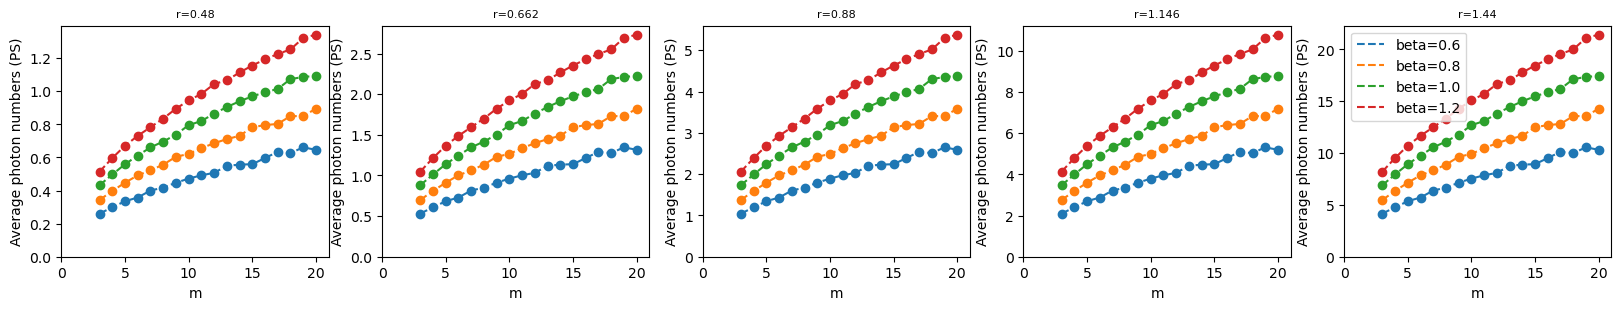

In [73]:
max_m = 20
f = plt.figure(figsize=(20,3))
f1 = plt.figure(figsize=(20,3))
for i, r in enumerate([0.48, 0.662, 0.88, 1.146, 1.44]):
    ax = f.add_subplot(1,5,i+1)
    ax1 = f1.add_subplot(1,5,i+1)
    for beta in [0.6, 0.8, 1.0, 1.2]:
        EEs = np.zeros(max_m + 1)
        EEs[:] = np.nan
        PSs = np.zeros(max_m + 1)
        PSs[:] = np.nan
        dirs = os.listdir('./EE vs m')
        for m in range(3, max_m + 1):
            beta_m_dir = 'Does not exist'
            ideal_ave_photons = m#*sinh(r)**2
            lossy_ave_photons = beta*sqrt(ideal_ave_photons)
            loss = round(100*(1 - lossy_ave_photons/ideal_ave_photons))/100
            PS_float = (1-loss)*m*sinh(r)**2
            PSs[m] = PS_float
            PS_int = int(PS_float)
            weight_1 = PS_float - PS_int
            weight_0 = 1 - weight_1
            ave_ee = [None, None]
            for j, PS in enumerate([PS_int, PS_int + 1]):
                pattern = re.compile('n_20_m_{}_beta_{}_.*_r_{}_PS_{}$'.format(m, beta, r, PS))
                for dir in dirs:
                    match = pattern.findall(dir)
                    if len(match) != 0:
                        beta_m_dir = './EE vs m/' + match[0]
                # print(PS, ps_dir)
                if not os.path.isdir(beta_m_dir):
                    continue
                files = os.listdir(beta_m_dir)
                files = [file for file in files if file[:2] == 'EE']
                tot_ee = 0
                for file in files:
                    ee = np.load(beta_m_dir + '/' + file)
                    # print('ee:', ee)
                    ee = np.max(ee)
                    # print('ee:', ee)
                    tot_ee += ee
                if len(files) != 0:
                    ave_ee[j] = tot_ee/len(files)
                else:
                    continue
            if ave_ee[0] != None and ave_ee[1] != None:
                EEs[m] = ave_ee[0]*weight_0 + ave_ee[1]*weight_1
            else:
                continue

            # print(beta_m_dir, m, len(files))
            

        ax.plot(np.array([ps for ps in range(max_m + 1)]), EEs, '--', label='beta={}'.format(beta))
        ax.scatter(np.array([ps for ps in range(max_m + 1)]), EEs)
        ax1.plot(np.array([ps for ps in range(max_m + 1)]), PSs, '--', label='beta={}'.format(beta))
        ax1.scatter(np.array([ps for ps in range(max_m + 1)]), PSs)
    ax1.set_ylim(0,)
    ax1.set_xlim(0,max_m + 1)
    ax.set_xticks([0,2,4,6,8,10,12,14,16,18,20])
    ax1.set_xlabel('m')
    ax1.set_ylabel('Average photon numbers (PS)')
    ax1.set_title('r={}'.format(r), fontsize=8)
    ax.set_ylim(0,)
    ax.set_xlim(0,max_m + 1)
    ax.set_xticks([0,2,4,6,8,10,12,14,16,18,20])
    ax.set_xlabel('m')
    ax.set_ylabel('EE')
    ax.set_title('r={}'.format(r), fontsize=8)
    if i == 4:
        ax1.legend()
        ax.legend()
# f.suptitle('Loss=0.75 EE scaling with vs sector')
# plt.savefig('Loss=0.75 EE scaling with vs sector.pdf')

# Gaussian full sim 1/4

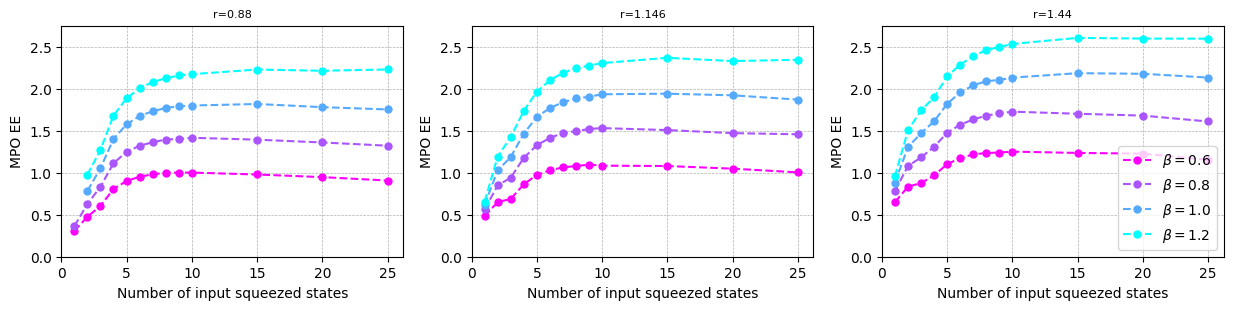

In [3]:
from experiments_gen import determine_hilbert_space_dimension_from_gaussian_state_parameters_and_target_probability

colors = cm.cool(np.linspace(1, 0, 4))
input_state_type = 'Gaussian'
target_probability = 0.99
post_selected_photon_number = None
n_input_states_list = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40]
f = plt.figure(figsize=(15,3))
# f1 = plt.figure(figsize=(12,3))
for i, squeeze_parameter in enumerate([0.88, 1.146, 1.44]):
    ax = f.add_subplot(1,3,i+1)
    # ax1 = f1.add_subplot(1,3,i+1)
    for j, beta in enumerate([0.6, 0.8, 1.0, 1.2]):
        EEs = np.zeros(len(n_input_states_list))
        # PSs = np.zeros(len(n_input_states_list))
        EEs[:] = np.nan
        # PSs[:] = np.nan
        for k, n_input_states in enumerate(n_input_states_list):
            n_modes = max(20, 4 * n_input_states)
            ideal_ave_photons = n_input_states*sinh(squeeze_parameter)**2
            lossy_ave_photons = beta*ideal_ave_photons**(1/4)
            loss = round(1000*(1 - lossy_ave_photons/ideal_ave_photons))/1000
            local_hilbert_space_dimension = determine_hilbert_space_dimension_from_gaussian_state_parameters_and_target_probability(n_input_states, squeeze_parameter, loss, target_probability)
            init_chi = local_hilbert_space_dimension**2
            bond_dimension = int(max(8*2**lossy_ave_photons, local_hilbert_space_dimension**2, 512))
            parameters = {"beta": beta, "loss": loss, "r": squeeze_parameter}
            
            begin_directory = '/home/minzhaoliu/BosonSamplingOld/Results/{}/1_4/n_{}_m_{}_PS_{}_d_{}_p_{}_'.format(input_state_type, n_modes, n_input_states, post_selected_photon_number, local_hilbert_space_dimension, parameters)
            chi_file = begin_directory + 'chi.npy'

            if not os.path.isfile(chi_file):
                continue
            chi_array = np.load(chi_file)
            # print(chi_array)
            if chi_array.shape[0] == 0:
                continue
            chi = int(np.max(chi_array))
            EE_file = begin_directory + 'chi_{}_EE.npy'.format(chi)
            EE = np.load(EE_file)
            prob_file = begin_directory + 'chi_{}_prob.npy'.format(chi)
            Totprob = np.load(prob_file)
            # if Totprob[-1] != 0:
            #     continue
            Totprob = Totprob[np.where(Totprob > 0)[0]]
            if np.argmax(EE)//EE.shape[0] >= EE.shape[1] - 11:
                print('EE did not saturate')
                continue
            error = np.max(Totprob)/np.min(Totprob) - 1
            if error > 0.1:
                print('Error too large')
                continue
            EEs[k] = np.max(EE)    
            # PSs[k] = lossy_ave_photons    

        ax.plot(n_input_states_list, EEs, linestyle='--', marker='o', markersize=5, color=colors[j], label=r'$\beta=$'+'{}'.format(beta))
        # ax.scatter(n_input_states_list, EEs, s=20, color=colors[j],label='1')
        ax.grid(which='both', linestyle = '--', linewidth = 0.5)
        # ax.scatter(np.array([PSs[m] for m in range(max_m + 1)]), EEs, s=2)
        # ax1.plot(n_input_states_list, PSs, '--', label='beta={}'.format(beta))
        # ax1.scatter(n_input_states_list, PSs)
    # ax1.set_ylim(0,)
    # ax1.set_xlim(0,)
    # ax1.set_xlabel('m')
    # ax1.set_ylabel('Average photon numbers (PS)')
    # ax1.set_title('r={}'.format(r), fontsize=8)
    ax.set_ylim(0,2.75)
    ax.set_xlim(0)
    # ax.set_xticks([0,2,4,6,8,10,12,14,16,18,20])
    ax.set_xlabel('Number of input squeezed states')
    ax.set_ylabel('MPO EE')
    ax.set_title('r={}'.format(squeeze_parameter), fontsize=8)
    if i == 2:
        # ax.plot(np.arange(2, 26, 1), np.array([0.796512, 0.834852, 0.852799, 0.859898, 0.860915, 0.858374, 0.8537,0.847737, 0.841005, 0.833834, 0.826438, 0.818957, 0.811486, 0.804085,0.796797, 0.789647, 0.782652, 0.775821, 0.769161, 0.762672, 0.756353, 0.750203, 0.744217, 0.738391]),color=colors[0],label='beta=0.6',linewidth=1,linestyle='--')
        # ax.plot(np.arange(2, 26, 1), np.array([1.10673, 1.17233, 1.21356, 1.23848, 1.25293, 1.2605, 1.26343, 1.26316, 1.26066, 1.25658, 1.25139, 1.2454, 1.23885, 1.23191, 1.22471, 1.21736, 1.20991, 1.20242, 1.19494, 1.18749, 1.18011, 1.1728, 1.16558, 1.15846]),color=colors[1],label='beta=0.8',linewidth=1,linestyle='--')
        # ax.plot(np.arange(2, 26, 1), np.array([1.43389, 1.51367, 1.5765, 1.62086, 1.65155, 1.67244, 1.68625, 1.69486, 1.6996, 1.70143, 1.70104, 1.69895, 1.69554, 1.69112, 1.68591, 1.68008, 1.67378, 1.66712, 1.66019, 1.65305, 1.64577, 1.63839, 1.63094, 1.62346]),color=colors[2],label='beta=1.0',linewidth=1,linestyle='--')
        # ax.plot(np.arange(2, 26, 1), np.array([1.79722, 1.86501, 1.94275, 2.00494, 2.0523, 2.08789, 2.1144, 2.13392, 2.148, 2.15782, 2.16427, 2.16803, 2.16963, 2.16949, 2.16793, 2.16521, 2.16155, 2.15711, 2.15205, 2.14646, 2.14045, 2.13409, 2.12745, 2.12059]),color=colors[3],label='beta=1.2',linewidth=1,linestyle='--')
        ax.legend()
# f.suptitle('Loss=0.75 EE scaling with vs sector')
# plt.savefig('Loss=0.75 EE scaling with vs sector.pdf')

plt.savefig('1_4 scaling.svg')

# Gaussian full sim 1/2

../BosonSamplingOld/Results/Gaussian/1_4/n_20_m_1_PS_None_d_13_p_{'beta': 1.2, 'loss': 0.286, 'r': 1.146}_ 512
14


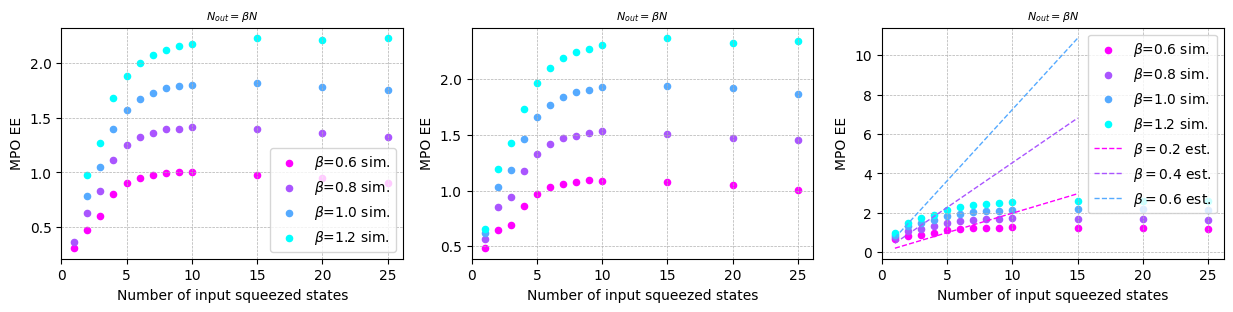

In [16]:
from experiments_gen import determine_hilbert_space_dimension_from_gaussian_state_parameters_and_target_probability

colors = cm.cool(np.linspace(1, 0, 4))
max_d = 0
input_state_type = 'Gaussian'
target_probability = 0.99
post_selected_photon_number = None
n_input_states_list = [1,2,3,4,5,6,7,8,9,10,15,20,25]#,30,40,50]
f = plt.figure(figsize=(15,3))
# f1 = plt.figure(figsize=(12,3))
for i, squeeze_parameter in enumerate([0.88, 1.146, 1.44]):
    ax = f.add_subplot(1,3,i+1)
    # ax1 = f1.add_subplot(1,3,i+1)
    for j, beta in enumerate([0.6, 0.8, 1.0, 1.2]):
        EEs = np.zeros(len(n_input_states_list))
        # PSs = np.zeros(len(n_input_states_list))
        EEs[:] = np.nan
        # PSs[:] = np.nan
        for k, n_input_states in enumerate(n_input_states_list):
            n_modes = max(20, 4 * n_input_states)
            ideal_ave_photons = n_input_states*sinh(squeeze_parameter)**2
            lossy_ave_photons = beta*ideal_ave_photons**(1/4)
            loss = round(1000*(1 - lossy_ave_photons/ideal_ave_photons))/1000
            local_hilbert_space_dimension = determine_hilbert_space_dimension_from_gaussian_state_parameters_and_target_probability(n_input_states, squeeze_parameter, loss, target_probability)
            init_chi = local_hilbert_space_dimension**2
            bond_dimension = int(max(8*2**lossy_ave_photons, local_hilbert_space_dimension**2, 512))
            parameters = {"beta": beta, "loss": loss, "r": squeeze_parameter}
            
            begin_directory = '../BosonSamplingOld/Results/{}/1_4/n_{}_m_{}_PS_{}_d_{}_p_{}_'.format(input_state_type, n_modes, n_input_states, post_selected_photon_number, local_hilbert_space_dimension, parameters)
            chi_file = begin_directory + 'chi.npy'

            if not os.path.isfile(chi_file):
                continue
            chi_array = np.load(chi_file)
            # print(chi_array)
            if chi_array.shape[0] == 0:
                continue
            chi = int(np.max(chi_array))
            EE_file = begin_directory + 'chi_{}_EE.npy'.format(chi)
            EE = np.load(EE_file)
            max_layer = np.argmax(EE)//EE.shape[0]
            prob_file = begin_directory + 'chi_{}_prob.npy'.format(chi)
            Totprob = np.load(prob_file)[:max_layer + 10]
            # if Totprob[-1] != 0:
            #     continue
            Totprob = Totprob[np.where(Totprob > 0)[0]]
            if max_layer >= EE.shape[1] - 11:
                print('EE did not saturate')
                continue
            error = np.max(Totprob)/np.min(Totprob) - 1
            if np.min(Totprob) < 0.9:
            # if error > 0.1:
                print('Error too large')
                continue
            EEs[k] = np.max(EE)
            max_d = max(max_d, local_hilbert_space_dimension)  
            # PSs[k] = lossy_ave_photons  
            if local_hilbert_space_dimension == 13:
                print(begin_directory, chi)  

        # ax.plot(n_input_states_list, EEs, linestyle='--', marker='o', markersize=5, color=colors[j], label='beta={}'.format(beta))
        ax.scatter(n_input_states_list, EEs, s=20, color=colors[j], label=r'$\beta$'+'={} sim.'.format(beta))
        ax.grid(which='both', linestyle = '--', linewidth = 0.5)
        # ax.scatter(np.array([PSs[m] for m in range(max_m + 1)]), EEs, s=2)
        # ax1.plot(n_input_states_list, PSs, '--', label='beta={}'.format(beta))
        # ax1.scatter(n_input_states_list, PSs)
    # ax1.set_ylim(0,)
    # ax1.set_xlim(0,)
    # ax1.set_xlabel('m')
    # ax1.set_ylabel('Average photon numbers (PS)')
    # ax1.set_title('r={}'.format(r), fontsize=8)
    # ax.set_ylim(0,2.75)
    ax.set_xlim(0)
    # ax.set_ylim(0,5.5)
    # ax.set_xticks([0,2,4,6,8,10,12,14,16,18,20])
    ax.set_xlabel('Number of input squeezed states')
    ax.set_ylabel('MPO EE')
    ax.set_title(r'$N_{out}=\beta N$', fontsize=8)
    if i == 0:
        # ax1.legend()
        ax.legend()

ax.plot(np.arange(1, 16, 1), np.array([0.197843, 0.395685, 0.593528, 0.79137, 0.989213, 1.18706, 1.3849, 1.58274, 1.78058, 1.97843, 2.17627, 2.37411, 2.57195, 2.7698, 2.96764]),color=colors[0],label=r'$\beta=0.2$ est.',linewidth=1,linestyle='--')
ax.plot(np.arange(1, 16, 1), np.array([0.45412, 0.90824, 1.36236, 1.81648, 2.2706, 2.72472, 3.17884, 3.63296, 4.08708, 4.5412, 4.99532, 5.44944, 5.90356, 6.35768, 6.8118]),color=colors[1],label=r'$\beta=0.4$ est.',linewidth=1,linestyle='--')
ax.plot(np.arange(1, 16, 1), np.array([0.724705, 1.44941, 2.17412, 2.89882, 3.62353, 4.34823, 5.07294, 5.79764, 6.52235, 7.24705, 7.97176, 8.69646, 9.42117, 10.1459, 10.8706]),color=colors[2],label=r'$\beta=0.6$ est.',linewidth=1,linestyle='--')
ax.grid(which='both', linestyle = '--', linewidth = 0.5)
ax.legend()
# f.suptitle('Loss=0.75 EE scaling with vs sector')
# plt.savefig('Loss=0.75 EE scaling with vs sector.pdf')
# plt.savefig('Linear scaling.svg')
print(max_d)

In [7]:
Error too large
Error too large
Error too large
./Results/Gaussian/constant/n_60_m_15_PS_None_d_18_p_{'beta': 0.4, 'loss': 0.6, 'r': 0.88}_ 16384
Error too large
./Results/Gaussian/constant/n_36_m_9_PS_None_d_18_p_{'beta': 0.6, 'loss': 0.4, 'r': 0.88}_ 8192

18